# Logistic Regression
----------------------------------------------------------------------------------------------------------------
In our previous book on Logistic Regression, we saw that our model wasn't very accurate, and that is because we didnt optimize it. In this notebook we will be taking a look at how to optimize our Logistic Regression algorithm so that it can give better results.

**A quick recap of what our columns depict:-**

* Passenger Class(PClass) - It determines the class in which the passenger was travelling. There were 3 classes - 1st,2nd and 3rd class on titanic.
* Name(Name) - It contains the name of the passenger onboard.
* Sex(Sex)  - It contains the gender of the person.
* PassengerId(PassengerId) - ID of the passenger onboard.
* Survived(Survived) - Contains data about whether the passenger survived the accident or not.
* Age(Age) - Age of the passenger onboard.
* Sibling/Spouse on board(SibSp) - Contains the number of Siblings and Spouses of passengers on board.
* Parent and children on board(Parch) - Contains the number of Parents and Childrens of passengers on board.
* Ticket(Ticket) - Contains the in id of the Ticket purchased by the passenger.
* Price of the Ticket(Fare) - The price of the ticket purchased.
* Cabin(Cabin) - Cabin number of the passenger
* The Places the ship is travelling to(Embarked) - It contains the 3 ports that the ship was travelling to (C = Cherbourg; Q = Queenstown; S = Southampton).

**Our Goal:-**

* Our goal is to preict who would survive and who wouldn't survive this accident.

# Importing our Project dependencies
----------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Importing our data set
----------------------------------------------------------------------------------------------------------------
We will continue to use our Titanic Data for applying this algorithm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OneStep-elecTRON/ContentSection/main/Datasets/titanic_train.csv')

In [3]:
df.head() #checking the top 5 rows of our data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()  #to check different properties like mean, min and max of different columns which might help us later

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


One of the best way to check if there is any null value present in our data is to use a heatmap. Seaborn provies us with various plot and graphs and one of them is heatmaps. we can make a heatmap by using *'sns.heatmap()'*. We will use this to find null values

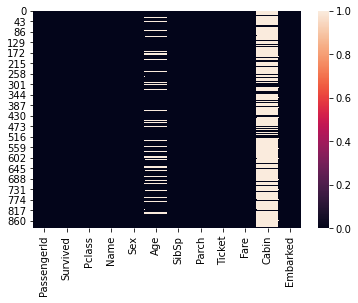

In [5]:
sns.heatmap((df.isnull()))

As we can see, we have a lot of null value in a few columns, now it depends on how much you think a particular column is important for our model. We can check the correlation between various columns and decide whether to keep these columns with null values or just drop them. We will make use of heatmaps again to check the correlation between these different columns.

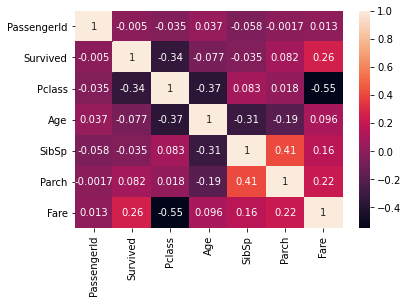

In [6]:
sns.heatmap(df.corr(),annot = True)

# Data Pre-Processing
----------------------------------------------------------------------------------------------------------------

As we can see, the 'Cabin' column is not very important and won't affect our final result if we choose to drop it. Cabin does not have  any numerical value in it, we can definitely convert that to numerical but for this notebook we will choose to drop it.

In [7]:
df.drop('Cabin',axis = 1,inplace = True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We succesfully dropped the 'Cabin' column and now lets take a look at the other columns that have null values in them. The only other column containing null values is 'Age'. Before we start filling these null values, lets do some data visualization in order to understand the data better

**sns.countplot()**  - It shows the the counts of the observations in each categorical bin using bars
We use this to check the number of people who survived the tragic event that occured.

Text(0.5, 1.0, 'Survivor counts')

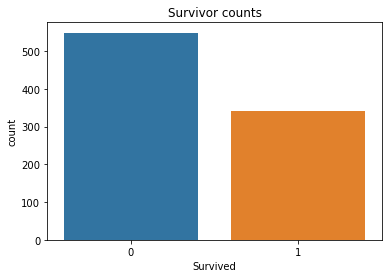

In [9]:
sns.countplot(df['Survived'],data = df).set_title('Survivor counts') #visualizing the survival count

We can see there are very less number of people that survived. Next, we will be making another countplot but this time we will be using *'hue'* as a parameter. Hue determines which column in the data frame should be used for color encoding. Here we are checking the number of male and females that survived the mishap

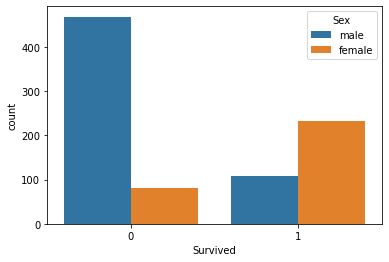

In [10]:
sns.countplot(df['Survived'],data = df,hue = 'Sex') #checking the amount of males and females in our survival set

**sns.barplot()** - A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

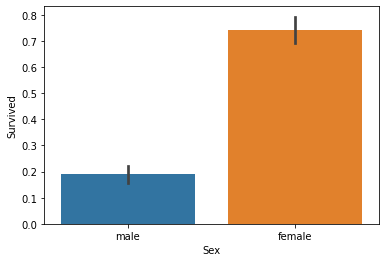

In [11]:
sns.barplot(x='Sex',y='Survived',data = df) #plotting to find out which gender survived the most

In [12]:
df.groupby('Pclass').Survived.mean() #taking the mean of the survived data according to the PClass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

We found the mean of the people that survived from different classes on the ship. Let's visualize the number of survivors from these different classes. Then we will go on and check the individual survival and death rate for each Pclass

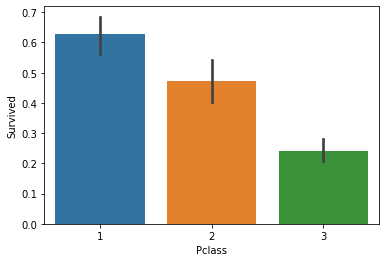

In [13]:
sns.barplot(x='Pclass',y='Survived',data = df) #checking the amount of passengers that survived on basis of PClass

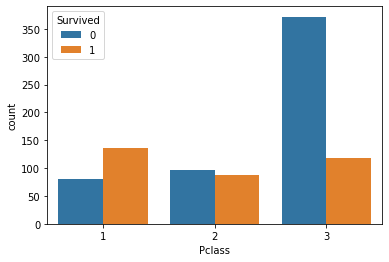

In [14]:
sns.countplot(x='Pclass',hue = 'Survived',data = df)

As we can see, the maximum number of people that died in the accident were from 3rd Class. And this makes sense because the 3rd class being cheaper, more people could afford it compared to 1st and 2nd classes. So now that we have a little bit more information about our data, lets start by filling up these Nan Values present in the 'Age' Column.

We know that the 3rd class mostly comprised of young people who could not afford these 1st and 2nd class tickets, so if we find a person that is First Class and the age value is null, we will fill that value with average age value of people travelling in that class, in our case its 37. similarly we will fill 28 in places of null in second class and for the third class we will just fill 24 as thats the average age of people in that class.

In [15]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute,axis = 1) #filling up these null values

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

We have successfully filled all the null values in the Age column but we can also see that there are two null values in embarked column. We can either drop these two null values because they are very less and wont affect our final result at all but we can also see that we don't have any numerical value in Embarked column, so we will go ahead and convert these values into numerical columns and we will do the same for Sex column as it also has non-numerical values. We are converting these values in order to make them more useful in our data and these will help us in getting a better result

*'pd.get_dummies()'* - Converts categorical variable into dummy/indicator variables. It helps convert a column that might have different categories into  different columns with numerical values. We will convert both Sex and Embarked columns using this method. We are also using 'drop_first' parameter in order to eliminate some extra column. For eg - in 'Sex' column we have both males and females but when we convert these values, we will get two columns, male and female, but we only need the male column to determine whether the person was male or not(female). So lets go ahead and make these changes

In [18]:
sex = pd.get_dummies(df['Sex'],drop_first = True)
embark = pd.get_dummies(df['Embarked'],drop_first = True)

In [19]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


We will now concatenate these two columns that we made using *'pd.concat()'* method. It concatenates these columns into our  main data frame and we define the 'axis = 1' parameter to concatenate them as columns and not rows. This will get us a new data frame with these new columns that we just made

In [21]:
df1 = pd.concat([df,sex,embark],axis = 1)

In [22]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


So we have our new dataframe but there are some columns that we dont need. These columns aren't providing any value to our final results and are not very useful so lets drop these values from our dataframe

In [23]:
df1.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [24]:
df1.head() #our new dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Modeling
-----------------------------------------------------------------------
Now that we are done with pre-processing our data, lets get started with model creation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

After importing our libraries, its now time to define our x and y values that we will use in the train-test split

In [26]:
x = df1.drop('Survived',axis = 1) #our features
y = df1['Survived'] #our target

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101) #splitting our data

Now that we have split the data in training and testing set, we can make our Logistic Regression model

In [28]:
lr = LogisticRegression() #creating the object of LogisticRegression()

In [29]:
lr.fit(x_train,y_train) #fitting the data to the model

LogisticRegression()

In [30]:
pred = lr.predict(x_test)

In [31]:
acc = confusion_matrix(y_test,pred)
acc1 = classification_report(y_test,pred,output_dict = True)
result = pd.DataFrame.from_dict(acc1)
print(acc)
result

[[135  19]
 [ 43  71]]


,0,1,accuracy,macro avg,weighted avg
precision,0.758427,0.788889,0.768657,0.773658,0.771385
recall,0.876623,0.622807,0.768657,0.749715,0.768657
f1-score,0.813253,0.696078,0.768657,0.754666,0.763410
support,154.000000,114.000000,0.768657,268.000000,268.000000


After optimizing our data, we see that our model has improved a lot! We went from 66% accuracy to 78%! And we can still improve this. With this we come to an end to this notebook. We recommend you to go through the notebook once again before heading to the exercise section.

* **Task** - Here is a small task for you to perform. Like we converted the 'Sex' and 'Embarked', you can also convert the 'Sibsp' and 'Parch' columns. You can also try doing something with the 'Name' column to get a better result. Try these out and see how it affects your model.